# 어레이 그림 그리기

참고: [(stackoverflow) How to draw images visualizing numpy arrays themselves?](https://stackoverflow.com/questions/77732026/how-to-draw-images-visualizing-numpy-arrays-themselves)

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.transforms import Bbox

def square(i, j, k, origin=(0,0), zstep=0.2, **kwargs):
    xy = np.array(origin) + np.array((k, j)) + np.array([1, -1]) * i * zstep
    return Rectangle(xy, 1, 1, zorder=-i, **kwargs)

def draw(a, *, origin=(0,0), zstep=0.2, ax=None,
         rect_kwargs=None, text_kwargs=None):
    ax = plt.gca() if ax is None else ax
    rect_kwargs = {} if rect_kwargs is None else rect_kwargs
    facecolor = rect_kwargs.pop('facecolor', 'lightblue')
    facecolor = np.broadcast_to(facecolor, a.shape)
    text_kwargs = {} if text_kwargs is None else text_kwargs
    textcolor = rect_kwargs.pop('color', 'k')
    textcolor = np.broadcast_to(textcolor, a.shape)
    text_kwargs = dict(ha='center', va='center') | text_kwargs
    im, jm, km = a.shape
    bboxes = []
    origin = np.array(origin) + np.array((0, zstep * im))
    for i in range(im):
        for j in range(jm):
            for k in range(km):
                r = square(i, j, k, origin=origin, edgecolor='k',
                           facecolor=facecolor[i, j, k], **rect_kwargs)
                ax.add_patch(r)
                bb = r.get_bbox()
                bboxes.append(bb)
                center = bb.get_points().mean(0)
                ax.annotate(a[i, j, k], center, **text_kwargs, zorder=-i)
    bb = Bbox.union(bboxes)
    # help auto axis limits
    ax.plot(*bb.get_points().T, '.', alpha=0)
    return bb

In [11]:
np.arange(np.prod((2, 3, 4))).reshape((2, 3, 4))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

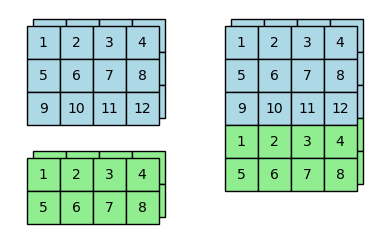

In [5]:
def np_example(shape):
    return 1 + np.arange(np.prod(shape)).reshape(shape)

a, b = [np_example(shape) for shape in [(2, 3, 4), (2, 2, 4)]]

fig, ax = plt.subplots(figsize=(4, 4))
draw(a, ax=ax)
draw(b, origin=(0, a.shape[1] + 1), rect_kwargs=dict(facecolor='lightgreen'))

acolor = np.broadcast_to('lightblue', a.shape)
bcolor = np.broadcast_to('lightgreen', b.shape)
draw(
    np.concatenate((a, b), axis=1), origin=(a.shape[2] + 2, 0),
    rect_kwargs=dict(facecolor=np.concatenate((acolor, bcolor), axis=1)))

ax.set_aspect(1)
ax.invert_yaxis()
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [6]:
a, b, c, d = [np_example(shape) for shape in [(2, 3, 4), (2, 2, 4), (2, 3, 2), (2, 3, 4)]]
colors = ['#ffe5b6', '#add8a3', '#c5dbfb', '#efd0dd']

arrs = [a, b, np.concatenate((a, b), axis=1),
        c, d, None,
        np.concatenate((a, c), axis=2), None, np.concatenate((a, d), axis=0)]
a_, b_, c_, d_ = [np.broadcast_to(c, ar.shape) for c, ar in zip(colors, [a, b, c, d])]
colors = [a_, b_, np.concatenate((a_, b_), axis=1),
        c_, d_, None,
        np.concatenate((a_, c_), axis=2), None, np.concatenate((a_, d_), axis=0)]
titles = ['a', 'b', 'np.concatenate((a, b), axis=1)',
          'c', 'd', None,
          'np.concatenate((a, c), axis=2)', None, 'np.concatenate((a, d), axis=0)']

x_pos = np.array((0, 5.5, 12))
y_pos = np.array((0, 4.5, 10))

origins = np.c_[np.meshgrid(x_pos, y_pos)].T.reshape(-1, 2)

fig, ax = plt.subplots(figsize=(6, 6))
for ar, color, title, origin in zip(arrs, colors, titles, origins):
    if ar is None:
        continue
    bb = draw(ar, origin=origin, rect_kwargs=dict(facecolor=color))
    cc = np.array(bb.coefs['S'])
    txt_xy = np.diagonal(np.c_[1-cc, cc] @ bb.get_points())
    ax.annotate(title, txt_xy, xytext=(0, 4), textcoords='offset points', ha='center', va='bottom')
ax.set_aspect(1.1)
ax.invert_yaxis()
ax.set_axis_off()
plt.tight_layout()
plt.show()